In [2]:

%pip install --user -U nltk
%pip install -U scikit-learn
%pip install beautifulsoup4
%pip install seaborn

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [click]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ----

In [1]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split     
from nltk.tokenize import ToktokTokenizer    
from nltk.stem import WordNetLemmatizer
import string
from bs4 import BeautifulSoup     
from nltk.tokenize import word_tokenize    
from nltk.corpus import stopwords 
import re            
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\papal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords

<WordListCorpusReader in 'C:\\Users\\papal\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [ ]:
df = pd.read_csv("./data/TwitterRenamed.csv")

In [7]:
df.columns

Index(['Unnamed: 0', 'sentiment', 'id of the tweet', 'date of the tweet',
       'query', 'user', 'review'],
      dtype='object')

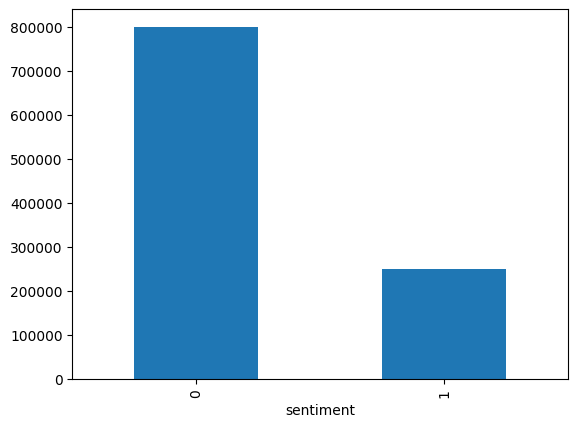

In [17]:
df.groupby(['sentiment'])['sentiment'].count().plot(kind='bar')
plt.savefig('Classes.png')

In [24]:
df['Tamanho dos comentários'] = df['review'].apply(len)

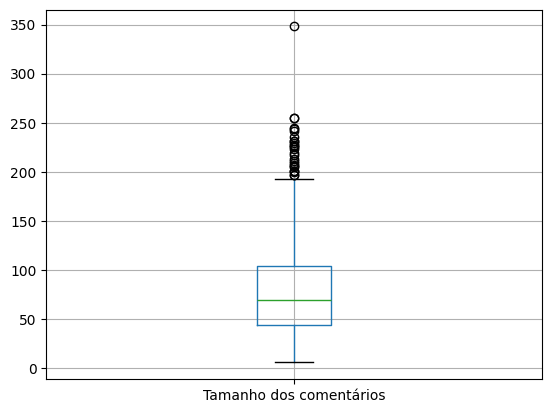

In [26]:
df.boxplot(column=['Tamanho dos comentários'])
plt.savefig("comentários.png")

In [27]:
df = df[['sentiment','review']]

In [ ]:
# df['review'][0],df['sentiment'][0]
# df['review'][799996],df['sentiment'][799996]

('I LOVE @Health4UandPets u guys r the best!! ', np.int64(1))

# Checando os dados

In [ ]:
df['sentiment'].value_counts()

sentiment
0    799996
1    248576
Name: count, dtype: int64

Stratified Sample

In [ ]:
stratified = df[df['sentiment']==1]['review'].count()
train_positive = df[df['sentiment']==1].sample(stratified*8//10)
test_positive =  df[df['sentiment']==1].drop(train_positive.index)

In [ ]:
train_positive.shape,test_positive.shape

((198860, 2), (49716, 2))

In [ ]:
train_negative = df[df['sentiment']==0].sample(stratified*8//10)
test_negative =  df[df['sentiment']==0].drop(train_negative.index)

In [ ]:
train_negative.shape, test_negative.shape

((198860, 2), (601136, 2))

## Unindo as amostras estratificadas

In [ ]:
train = pd.concat([train_positive,train_negative],ignore_index=True)
test = pd.concat([test_positive,test_negative],ignore_index=True)

Verificando se foi trazida com a porcentagem igual

In [ ]:
train['sentiment'].value_counts()

sentiment
1    198860
0    198860
Name: count, dtype: int64

Discomment if you want a sample of all dataset

In [ ]:
# train = train.sample(10000)
# test = test.sample(5000)

# Limpeza e Pre Processamento dos dados

In [ ]:
def preprocess_text(text:str):
    
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    tokens = word_tokenize(text.lower())

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    stemmer =  nltk.PorterStemmer()
    
    stopwords_set = set(stopwords.words("english"))
    
    tokens_2 = [stemmer.stem(token) for token in filtered_tokens if token not in stopwords_set]

    return tokens_2

In [ ]:
def strip(text):
    soup = BeautifulSoup(text,'html.parser')
    return soup.get_text()

def rm_square(text):
    return re.sub('[\(\[].*?[\)\]]','',text)

def denoise(text):
    text = strip(text)
    text = rm_square(text)
    return text

train['review'] = train['review'].apply(denoise)
test['review'] = test['review'].apply(denoise)

<>:6: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\('
C:\Users\papal\AppData\Local\Temp\ipykernel_4444\307135772.py:6: SyntaxWarning: invalid escape sequence '\('
  return re.sub('[\(\[].*?[\)\]]','',text)


In [ ]:
def remove_special(text):
    return re.sub('[^A-Za-z\s]+','',text)

train['review'] = train['review'].apply(remove_special)
test['review'] = test['review'].apply(remove_special)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\papal\AppData\Local\Temp\ipykernel_4444\3303347500.py:2: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('[^A-Za-z\s]+','',text)


In [ ]:
def stemming(text:str):
    port = nltk.PorterStemmer()
    text = ' '.join([port.stem(wd) for wd in text.split()])
    return text

train['review'] = train['review'].apply(stemming)
test['review'] = test['review'].apply(stemming)

In [ ]:
train['review']

0                   tommcfli see some funni video on youtub
1                              conversee on foot xd so cute
2         made taco for dinner now a frosti and twilight...
3         itsmeduh woop doin it real big i see have more...
4         georgieboo it wa a littl while ago but wossi a...
                                ...                        
397715    time to sleep sadli the man i want to have in ...
397716    i need a nap but i dont like take nap alon im ...
397717    india lost it again i need not be disappoint a...
397718    in school all alon ct off for report write day...
397719     dougiemcfli katpoynt i love you lol i wishh haha
Name: review, Length: 397720, dtype: object

# Treinando por Bag Of Words e Table Frequency

In [ ]:
results = dict()

### Bag of Words

In [ ]:
cv = CountVectorizer(min_df=1,binary=False,ngram_range=(1,3))

cv_train = cv.fit_transform(train[ 'review'])
cv_test = cv.transform(test[ 'review'])

In [ ]:
cv_train.shape,cv_test.shape

((397720, 4321977), (650852, 4321977))

### Table Frequency

In [ ]:
tv = TfidfVectorizer(min_df=1,use_idf=True,ngram_range=(1,3))

tv_train = tv.fit_transform(train['review'])
tv_test = tv.transform(test['review'])

In [ ]:
tv_train.shape,tv_test.shape

((397720, 4321977), (650852, 4321977))

# 1 - Modelo Logistic Regression

In [ ]:
lr =LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

lr_bow = lr.fit(cv_train,train['sentiment'])
lr_tv = lr.fit(tv_train,train['sentiment'])
print(lr_bow)
print(lr_tv)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
lr_bow_predict = lr_bow.predict(cv_test)
print(lr_bow_predict)

lr_tf_predict = lr_tv.predict(tv_test)
print(lr_tf_predict)

[0 0 1 ... 0 1 0]
[0 1 1 ... 0 1 0]


In [ ]:
results['Logistic Regression'] = {
    'Bag Of Words' : {
        'acc': accuracy_score(test['sentiment'],lr_bow_predict),
        'precision': precision_score(test['sentiment'],lr_bow_predict),
        'recal': recall_score(test['sentiment'],lr_bow_predict),
        'f1_score': f1_score(test['sentiment'],lr_bow_predict)
    },
    'Table Frequency' : {
        'acc': accuracy_score(test['sentiment'],lr_tf_predict),
        'precision': precision_score(test['sentiment'],lr_tf_predict),
        'recal': recall_score(test['sentiment'],lr_tf_predict),
        'f1_score': f1_score(test['sentiment'],lr_tf_predict)
    }
}

In [ ]:
lr_bow_acc = accuracy_score(test['sentiment'],lr_bow_predict)
print("Bag Of Words = ",lr_bow_acc)
lr_tf_acc = accuracy_score(test['sentiment'],lr_tf_predict)
print("Table = ",lr_tf_acc )

Bag Of Words =  0.876592527947982
Table =  0.826123296847824


In [ ]:
lr_trdf_report = classification_report(test['sentiment'],lr_bow_predict,target_names=['Positive','Negative'])
print(type(lr_trdf_report))

<class 'str'>


[[538520  62616]
 [ 17704  32012]]
[[498483 102653]
 [ 10515  39201]]


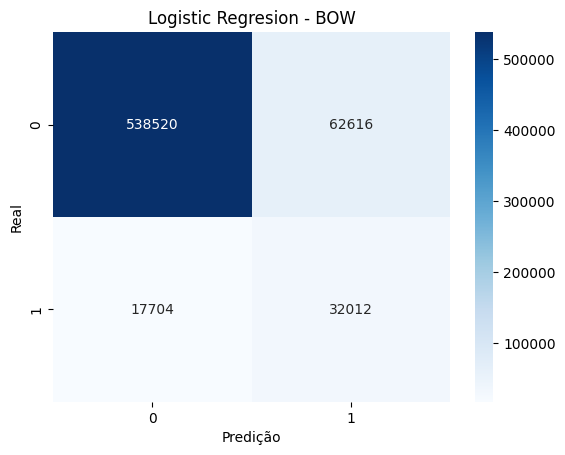

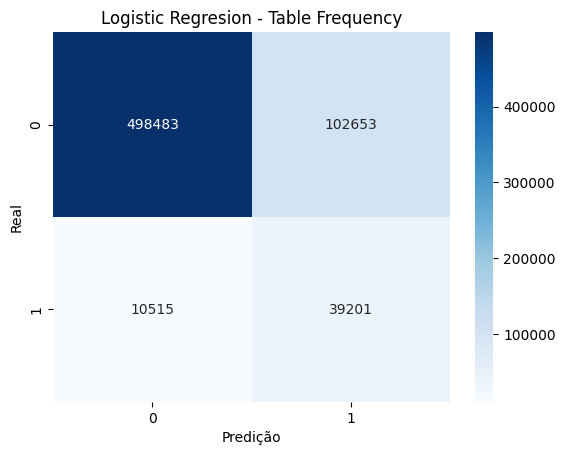

In [ ]:
cm_bow = confusion_matrix(test['sentiment'],lr_bow_predict,labels=[0,1])
print(cm_bow)
tf_bow = confusion_matrix(test['sentiment'],lr_tf_predict,labels=[0,1])
print(tf_bow)

sns.heatmap(cm_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Logistic Regresion - BOW")
plt.savefig('Logistic_Regresion_BOW.png')
plt.show()

sns.heatmap(tf_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Logistic Regresion - Table Frequency")
plt.savefig('Logistic_Regresion_TFID.png')
plt.show()

## Stochastic Gradient Descent

In [ ]:
svm = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

svm_bow = svm.fit(cv_train,train['sentiment'])
svm_tv = svm.fit(tv_train,train['sentiment'])
print(svm_bow)
print(svm_tv)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
svm_bow_predict = svm_bow.predict(cv_test)
print(svm_bow_predict)

svm_tf_predict = svm_tv.predict(tv_test)
print(svm_tf_predict)

[0 0 1 ... 0 1 0]
[0 1 1 ... 0 1 0]


In [ ]:
results['SVM'] = {
    'Bag Of Words' : {
        'acc': accuracy_score(test['sentiment'],svm_bow_predict),
        'precision': precision_score(test['sentiment'],svm_bow_predict),
        'recal': recall_score(test['sentiment'],svm_bow_predict),
        'f1_score': f1_score(test['sentiment'],svm_bow_predict)
    },
    'Table Frequency' : {
        'acc': accuracy_score(test['sentiment'],svm_tf_predict),
        'precision': precision_score(test['sentiment'],svm_tf_predict),
        'recal': recall_score(test['sentiment'],svm_tf_predict),
        'f1_score': f1_score(test['sentiment'],svm_tf_predict)
    }
}

In [ ]:
svm_bow_acc = accuracy_score(test['sentiment'],svm_bow_predict)
print("Bag Of Words = ",svm_bow_acc)
svm_tf_acc = accuracy_score(test['sentiment'],svm_tf_predict)
print("Table = ",svm_tf_acc )

Bag Of Words =  0.8633375944147057
Table =  0.7901873236926368


In [ ]:
svm_trdf_report = classification_report(test['sentiment'],svm_bow_predict,target_names=['Positive','Negative'])
print(svm_trdf_report)

              precision    recall  f1-score   support

    Positive       0.96      0.89      0.92    601136
    Negative       0.29      0.54      0.38     49716

    accuracy                           0.86    650852
   macro avg       0.62      0.72      0.65    650852
weighted avg       0.91      0.86      0.88    650852



[[535004  66132]
 [ 22815  26901]]
[[477191 123945]
 [ 12612  37104]]


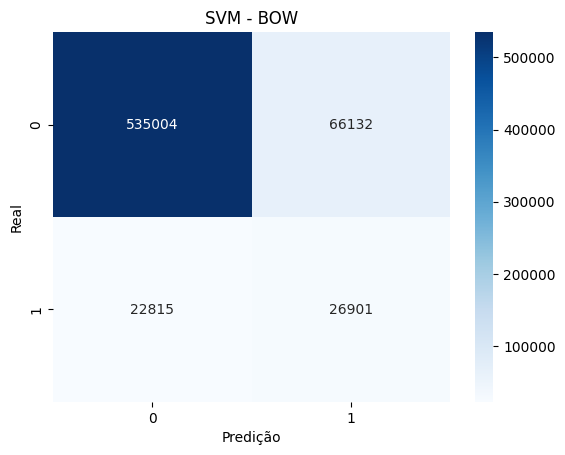

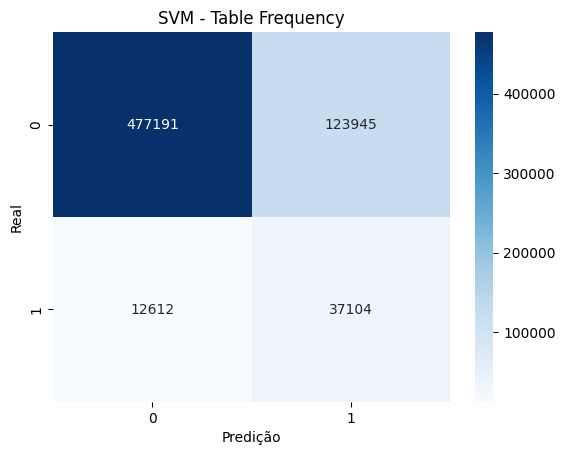

In [ ]:
cm_bow = confusion_matrix(test['sentiment'],svm_bow_predict,labels=[0,1])
print(cm_bow)
tf_bow = confusion_matrix(test['sentiment'],svm_tf_predict,labels=[0,1])
print(tf_bow)

sns.heatmap(cm_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("SVM - BOW")
plt.savefig('SVM_BOW.png')
plt.show()

sns.heatmap(tf_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("SVM - Table Frequency")
plt.savefig('SVM_TFID.png')
plt.show()

# Naive Bayes

In [ ]:
mvb = MultinomialNB()

mvb_bow = mvb.fit(cv_train, train['sentiment'])
mvb_tf = mvb.fit(tv_train, train['sentiment'])

In [ ]:
mvb_bow_predict = mvb_bow.predict(cv_test)
print(mvb_bow_predict)

mvb_tf_predict = mvb_tf.predict(tv_test)
print(mvb_tf_predict)

[0 1 1 ... 0 1 0]
[0 1 1 ... 0 1 0]


In [ ]:
results['Naive Bayes'] = {
    'Bag Of Words' : {
        'acc': accuracy_score(test['sentiment'],mvb_bow_predict),
        'precision': precision_score(test['sentiment'],mvb_bow_predict),
        'recal': recall_score(test['sentiment'],mvb_bow_predict),
        'f1_score': f1_score(test['sentiment'],mvb_bow_predict)
    },
    'Table Frequency' : {
        'acc': accuracy_score(test['sentiment'],mvb_tf_predict),
        'precision': precision_score(test['sentiment'],mvb_tf_predict),
        'recal': recall_score(test['sentiment'],mvb_tf_predict),
        'f1_score': f1_score(test['sentiment'],mvb_tf_predict)
    }
}

In [ ]:
mvb_bow_acc = accuracy_score(test['sentiment'],mvb_bow_predict)
print("Bag Of Words = ",mvb_bow_acc)
mvb_tf_acc = accuracy_score(test['sentiment'],mvb_tf_predict)
print("Table = ",mvb_tf_acc )

Bag Of Words =  0.8625447874478376
Table =  0.8525886069336808


[[526288  74848]
 [ 14615  35101]]
[[518537  82599]
 [ 13344  36372]]


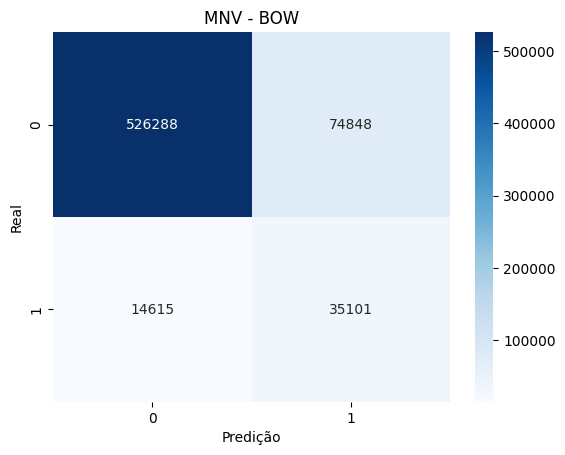

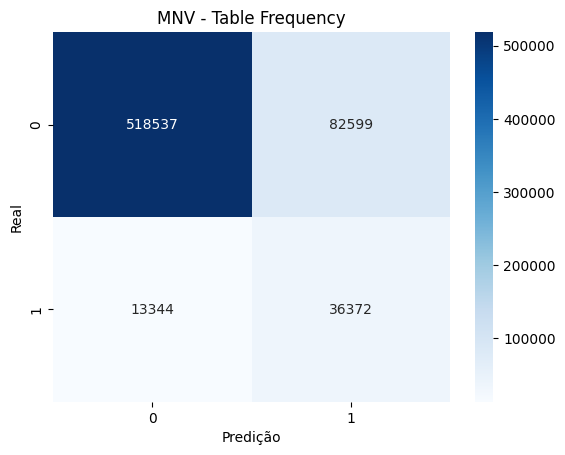

In [ ]:
cm_bow = confusion_matrix(test['sentiment'],mvb_bow_predict,labels=[0,1])
print(cm_bow)
tf_bow = confusion_matrix(test['sentiment'],mvb_tf_predict,labels=[0,1])
print(tf_bow)

sns.heatmap(cm_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("MNV - BOW")
plt.savefig('MNV_BOW.png')
plt.show()

sns.heatmap(tf_bow,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("MNV - Table Frequency")
plt.savefig('MNV_TFID.png')
plt.show()

In [ ]:
import json

with open('results.json', 'w') as file:
     file.write(json.dumps(results))